# Predicting Car Prices

In this project I wil practice machine learning workflow. I will work with a UCI dataset that can be accessed [here](https://archive.ics.uci.edu/ml/datasets/automobile). It is a 1985 car catalogue that contains characteristics of cars and their prices. I will try using k-nearest neighbors algorythm to predict car prices, based on this catalogue. 


In [176]:
import pandas as pd
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)
pd.options.display.max_columns = 99
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the dataset

In [177]:
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_columns]

In [178]:
import numpy as np
numeric_cars = numeric_cars.replace('?', np.nan)

In [179]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   normalized-losses  object 
 1   wheel-base         float64
 2   length             float64
 3   width              float64
 4   height             float64
 5   curb-weight        int64  
 6   engine-size        int64  
 7   bore               object 
 8   stroke             object 
 9   compression-rate   float64
 10  horsepower         object 
 11  peak-rpm           object 
 12  city-mpg           int64  
 13  highway-mpg        int64  
 14  price              object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [180]:
#Converting the object type columns into int and float types
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].astype(float)
numeric_cars['bore'] = numeric_cars['bore'].astype(float)
numeric_cars['stroke'] = numeric_cars['stroke'].astype(float)
numeric_cars['horsepower'] = numeric_cars['horsepower'].astype(float)
numeric_cars['peak-rpm'] = numeric_cars['peak-rpm'].astype(float)
numeric_cars['price'] = numeric_cars['price'].astype(float)

In [181]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

NaN values make up 16% of all the values in the `normalized-losses` column, so we cannot drop them. We cannot drop the whole column eather, because the average loss payments can influence the price. We will replace the missing values with mean values of the column. We will do the same for other columns with missing values, except for the target `price` column.


In [182]:
numeric_cars['price'] = numeric_cars['price'].dropna()
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [183]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   normalized-losses  float64
 1   wheel-base         float64
 2   length             float64
 3   width              float64
 4   height             float64
 5   curb-weight        int64  
 6   engine-size        int64  
 7   bore               float64
 8   stroke             float64
 9   compression-rate   float64
 10  horsepower         float64
 11  peak-rpm           float64
 12  city-mpg           int64  
 13  highway-mpg        int64  
 14  price              float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


In [184]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate model

We will write a function that takes in a dataset, a feture column? and a target column. It then divides the dataset into train and test subsets, fits the data into the k-nearest neighbors model, and returns the rmse score.

In [195]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index)) 
    three_quarters = int(len(df)*0.75)
    train = df[:three_quarters]
    test = df[three_quarters:]
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

We will now apply the function to all the numeric columns one by one to see which one brings the lowest rmse (root mean square error) score.

In [196]:
feature_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
col_rmses = {}
for col in feature_cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    col_rmses[rmse] = col

import collections
print(collections.OrderedDict(sorted(col_rmses.items())))

OrderedDict([(3835.864228684281, 'horsepower'), (4245.3866399205, 'engine-size'), (4605.254693760915, 'width'), (4654.0457107709935, 'curb-weight'), (5069.9417801013105, 'highway-mpg'), (5502.3732961484875, 'length'), (5820.761368089762, 'compression-rate'), (6138.575614229651, 'city-mpg'), (6509.713875828751, 'wheel-base'), (6826.962946861964, 'bore'), (7796.172563137595, 'stroke'), (7950.099565721727, 'normalized-losses'), (8220.29571279398, 'height'), (8975.78056919779, 'peak-rpm')])


In [197]:
#Modifying the function to include k_value as parameter
def knn_train_test(train_col, target_col, df, k_value):
    np.random.seed(1)
    knn = KNeighborsRegressor(n_neighbors=k_value)
    df = df.reindex(np.random.permutation(df.index)) 
    three_quarters = int(len(df)*0.75)
    train = df[:three_quarters]
    test = df[three_quarters:]
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

rmses = pd.DataFrame()
rmses['k_value'] = [1,3,5,7,9]
for col in feature_cols:
    col_rmses = []
    for k in rmses['k_value']:
        rmse = knn_train_test(col, 'price', numeric_cars, k)
        col_rmses.append(rmse)
    rmses[col] = col_rmses
rmses

,k_value,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,8607.644614,5788.427618,4627.547647,6385.274019,9223.278385,6445.532282,5690.585763,7083.433850,11571.141839,9645.695493,5912.858725,10662.766128,4993.820116,5342.322235
1,3,6746.522343,6021.386903,4710.557549,4991.542694,8077.215598,4779.419040,4503.491892,8611.505959,8147.032573,7700.857534,5276.706003,9293.864120,4319.881589,4776.037744
2,5,7013.193307,6409.921748,5120.907605,5096.922317,7666.739766,4117.825616,4369.936144,7383.879687,7335.502351,8300.669929,5349.836892,9376.609784,4260.776325,4440.883937
3,7,7290.386817,6438.437979,5495.805988,4809.405908,7634.974851,3987.369112,4419.711631,6969.419883,8189.595585,8193.952315,5326.228411,9460.575132,4300.740803,4126.039941
4,9,7473.315927,6471.312254,5670.145579,4959.811933,7868.439570,4064.483717,4332.205973,7126.205203,8164.369228,8119.162678,5356.274119,9377.143477,4760.677480,4095.917535


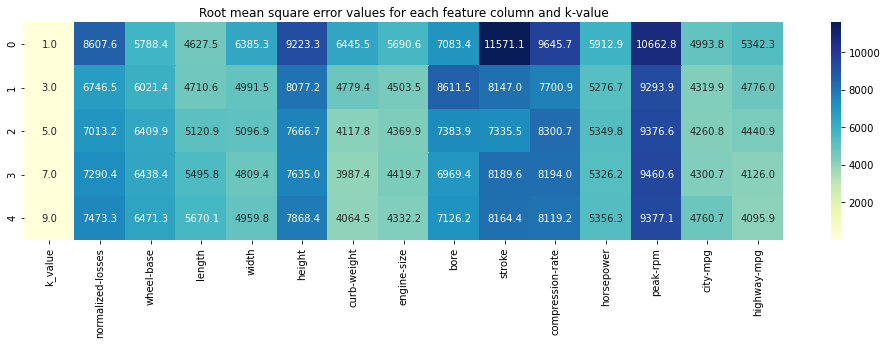

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(17,4))
sns.heatmap(rmses, ax=ax, cmap="YlGnBu", annot = True, fmt=".1f")
ax.set_title('Root mean square error values for each feature column and k-value')
plt.show()

In [199]:
# Displaying best features
five_best = rmses.mean().sort_values()[1:6].index
five_best = list(five_best)
print(five_best)

['city-mpg', 'highway-mpg', 'engine-size', 'curb-weight', 'length']


## Multivariate model
We will now modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.
We'll use the columns that had less error in the previous tests (the lighter colors in the heatmap above).

In [200]:
#Modifying the function to take multiple columns as features parameter
def knn_train_test(train_cols_list, target_col, df):
    np.random.seed(1)
    knn = KNeighborsRegressor()
    df = df.reindex(np.random.permutation(df.index)) 
    three_quarters = int(len(df)*0.75)
    train = df[:three_quarters]
    test = df[three_quarters:]
    knn.fit(train[train_cols_list], train[target_col])
    predictions = knn.predict(test[train_cols_list])
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

Now we will choose from 2 to 5 features from the best features listed above and fit them into the model to see which amount of features works best.

In [201]:
rmses_multi = {}
for i in range(2,6):
    cols = five_best[:i]
    rmse = knn_train_test(cols, 'price', numeric_cars)
    rmses_multi[i] = rmse
print('Number of best features: rmse value')
print(rmses_multi)

Number of best features: rmse value
{2: 4465.305320198489, 3: 3503.30406286074, 4: 3322.8589432076524, 5: 3095.312888439185}


## Hyperparameter optimization
We will now take three best feature configurations from the previous step (all except the 5-feature model), and try different amounts of neighbors (k-values) from 1 to 25 to find the optimal model setup. 

In [202]:
#Modifying the function to include k_value parameter
def knn_train_test(train_cols_list, target_col, df, k_value):
    np.random.seed(1)
    knn = KNeighborsRegressor(n_neighbors=k_value)
    df = df.reindex(np.random.permutation(df.index)) 
    three_quarters = int(len(df)*0.75)
    train = df[:three_quarters]
    test = df[three_quarters:]
    knn.fit(train[train_cols_list], train[target_col])
    predictions = knn.predict(test[train_cols_list])
    mse = mean_squared_error(test[target_col], predictions)
    return np.sqrt(mse)

In [193]:
rmses_multi_k = pd.DataFrame()
rmses_multi_k['k_value'] = range(1,26)

for i in range(2,5):
    cols = five_best[:i]
    col_values = []
    for k in rmses_multi_k['k_value']:
        rmse = knn_train_test(cols, 'price', numeric_cars, k)
        col_values.append(rmse)
    rmses_multi_k['{} features'.format(i)] = col_values
rmses_multi_k

,k_value,2 features,3 features,4 features
0,1,4816.183459,3644.953908,2837.784772
1,2,4204.545899,3802.215134,3794.747596
2,3,4429.206042,3405.439692,3754.769765
3,4,4050.780285,3359.334932,3519.775451
4,5,4465.305320,3503.304063,3322.858943
5,6,4470.973804,3706.558988,3456.414051
6,7,4359.422634,3894.744458,3450.181236
7,8,4244.766005,3935.035112,3426.957375
8,9,4280.688621,3713.733965,3604.421077
9,10,4343.713969,3683.579963,3614.653072


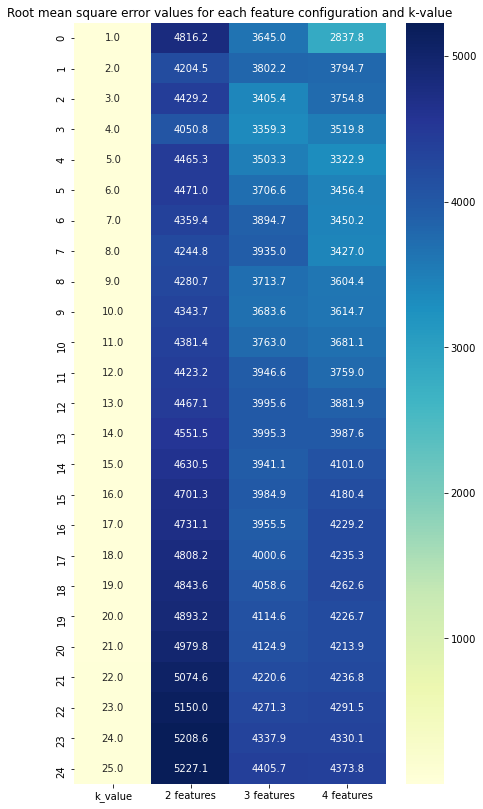

In [203]:
fig, ax = plt.subplots(figsize=(7,14))
sns.heatmap(rmses_multi_k, ax=ax, cmap="YlGnBu", annot = True, fmt=".1f")
ax.set_title('Root mean square error values for each feature configuration and k-value')
plt.show()

Optimal k values for each feature configuration are:
2 features: 4 neighbors
3 features: 4 neighbors
4 features: 1 neighbor

## Next steps

Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
Modify the knn_train_test() function to perform the data cleaning as well.

In [204]:

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1)

def knn_train_test(train_cols_list, target_col, df, k_value):
    np.random.seed(1)
    knn = KNeighborsRegressor(n_neighbors=k_value)
    kf = KFold(5, shuffle=True, random_state=1) 
    mses = cross_val_score(knn, train_cols_list, target_col, scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(mses)
    return rmses

rmses_2f = knn_train_test(five_best[:2], 'price', numeric_cars, 4)
rmses_2f

ValueError: Found input variables with inconsistent numbers of samples: [2, 5]